<a href="https://colab.research.google.com/github/secons127/machine-learnig/blob/main/homework/svb_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 데이터 불러오기
iris = datasets.load_iris()
X = iris.data[:, :2]  # 꽃받침 길이와 너비
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 초기화 및 훈련
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = svm_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


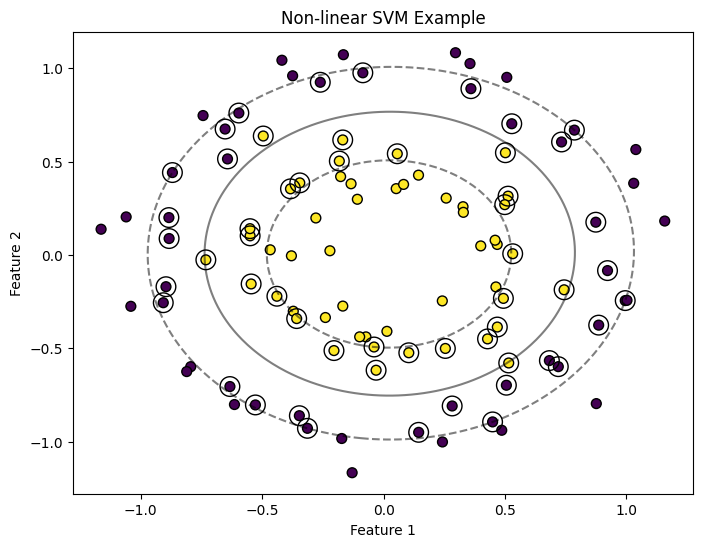

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# 인공적인 데이터 생성 (원형 데이터)
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# 모델 초기화 및 훈련
svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X, y)

# 결정 경계 그리기
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')

# 서포트 벡터 표시
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k')

# 결정 경계 표시
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 결정 경계 그리기
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linear SVM Example')
plt.show()